# Black Friday Dataset

In [1]:
import pandas as pd
df=pd.read_csv('black_friday.csv')
df

,User_ID,Product_ID,Gender,Age,Occupation,City_Category,Stay_In_Current_City_Years,Marital_Status,Product_Category_1,Product_Category_2,Product_Category_3,Purchase
0,1000001,P00069042,F,0-17,10,A,2,0,3,NaN,NaN,8370
1,1000001,P00248942,F,0-17,10,A,2,0,1,6.0,14.0,15200
2,1000001,P00087842,F,0-17,10,A,2,0,12,NaN,NaN,1422
3,1000001,P00085442,F,0-17,10,A,2,0,12,14.0,NaN,1057
4,1000002,P00285442,M,55+,16,C,4+,0,8,NaN,NaN,7969
...,...,...,...,...,...,...,...,...,...,...,...,...
550063,1006033,P00372445,M,51-55,13,B,1,1,20,NaN,NaN,368
550064,1006035,P00375436,F,26-35,1,C,3,0,20,NaN,NaN,371
550065,1006036,P00375436,F,26-35,15,B,4+,1,20,NaN,NaN,137
550066,1006038,P00375436,F,55+,1,C,2,0,20,NaN,NaN,365


## Handling missing data

In [2]:
df.isnull().sum()

User_ID                            0
Product_ID                         0
Gender                             0
Age                                0
Occupation                         0
City_Category                      0
Stay_In_Current_City_Years         0
Marital_Status                     0
Product_Category_1                 0
Product_Category_2            173638
Product_Category_3            383247
Purchase                           0
dtype: int64

In [3]:
df.info()


<class 'pandas.core.frame.DataFrame'>
RangeIndex: 550068 entries, 0 to 550067
Data columns (total 12 columns):
 #   Column                      Non-Null Count   Dtype  
---  ------                      --------------   -----  
 0   User_ID                     550068 non-null  int64  
 1   Product_ID                  550068 non-null  object 
 2   Gender                      550068 non-null  object 
 3   Age                         550068 non-null  object 
 4   Occupation                  550068 non-null  int64  
 5   City_Category               550068 non-null  object 
 6   Stay_In_Current_City_Years  550068 non-null  object 
 7   Marital_Status              550068 non-null  int64  
 8   Product_Category_1          550068 non-null  int64  
 9   Product_Category_2          376430 non-null  float64
 10  Product_Category_3          166821 non-null  float64
 11  Purchase                    550068 non-null  int64  
dtypes: float64(2), int64(5), object(5)
memory usage: 50.4+ MB


In [4]:
df['Product_Category_2'].unique()

array([nan,  6., 14.,  2.,  8., 15., 16., 11.,  5.,  3.,  4., 12.,  9.,
       10., 17., 13.,  7., 18.])

In [5]:
df['Product_Category_3'].unique()

array([nan, 14., 17.,  5.,  4., 16., 15.,  8.,  9., 13.,  6., 12.,  3.,
       18., 11., 10.])

In [6]:
df['Product_Category_3'].value_counts()

16.0    32636
15.0    28013
14.0    18428
17.0    16702
5.0     16658
8.0     12562
9.0     11579
12.0     9246
13.0     5459
6.0      4890
18.0     4629
4.0      1875
11.0     1805
10.0     1726
3.0       613
Name: Product_Category_3, dtype: int64

#### since there are large number of missing values then we will not drop records, we will impute, one time by using simple imputer and the other time KNNImpute

In [7]:
from sklearn.impute import SimpleImputer
imputer=SimpleImputer(strategy='most_frequent')
df['Product_Category_2']=imputer.fit_transform(df[['Product_Category_2']])
df['Product_Category_3']=imputer.fit_transform(df[['Product_Category_3']])
df.isnull().sum()
print(imputer.statistics_)

[16.]


#### Since the values are discrete representing categories so we used mode "most_frequent"  staretgy to replace the missing values

In [8]:
df

,User_ID,Product_ID,Gender,Age,Occupation,City_Category,Stay_In_Current_City_Years,Marital_Status,Product_Category_1,Product_Category_2,Product_Category_3,Purchase
0,1000001,P00069042,F,0-17,10,A,2,0,3,8.0,16.0,8370
1,1000001,P00248942,F,0-17,10,A,2,0,1,6.0,14.0,15200
2,1000001,P00087842,F,0-17,10,A,2,0,12,8.0,16.0,1422
3,1000001,P00085442,F,0-17,10,A,2,0,12,14.0,16.0,1057
4,1000002,P00285442,M,55+,16,C,4+,0,8,8.0,16.0,7969
...,...,...,...,...,...,...,...,...,...,...,...,...
550063,1006033,P00372445,M,51-55,13,B,1,1,20,8.0,16.0,368
550064,1006035,P00375436,F,26-35,1,C,3,0,20,8.0,16.0,371
550065,1006036,P00375436,F,26-35,15,B,4+,1,20,8.0,16.0,137
550066,1006038,P00375436,F,55+,1,C,2,0,20,8.0,16.0,365


## Categorical Features

In [9]:
df=pd.get_dummies(df,columns=['Gender','City_Category','Stay_In_Current_City_Years','Age'],drop_first=True)
df

,User_ID,Product_ID,Occupation,Marital_Status,Product_Category_1,Product_Category_2,Product_Category_3,Purchase,Gender_M,City_Category_B,...,Stay_In_Current_City_Years_1,Stay_In_Current_City_Years_2,Stay_In_Current_City_Years_3,Stay_In_Current_City_Years_4+,Age_18-25,Age_26-35,Age_36-45,Age_46-50,Age_51-55,Age_55+
0,1000001,P00069042,10,0,3,8.0,16.0,8370,0,0,...,0,1,0,0,0,0,0,0,0,0
1,1000001,P00248942,10,0,1,6.0,14.0,15200,0,0,...,0,1,0,0,0,0,0,0,0,0
2,1000001,P00087842,10,0,12,8.0,16.0,1422,0,0,...,0,1,0,0,0,0,0,0,0,0
3,1000001,P00085442,10,0,12,14.0,16.0,1057,0,0,...,0,1,0,0,0,0,0,0,0,0
4,1000002,P00285442,16,0,8,8.0,16.0,7969,1,0,...,0,0,0,1,0,0,0,0,0,1
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
550063,1006033,P00372445,13,1,20,8.0,16.0,368,1,1,...,1,0,0,0,0,0,0,0,1,0
550064,1006035,P00375436,1,0,20,8.0,16.0,371,0,0,...,0,0,1,0,0,1,0,0,0,0
550065,1006036,P00375436,15,1,20,8.0,16.0,137,0,1,...,0,0,0,1,0,1,0,0,0,0
550066,1006038,P00375436,1,0,20,8.0,16.0,365,0,0,...,0,1,0,0,0,0,0,0,0,1


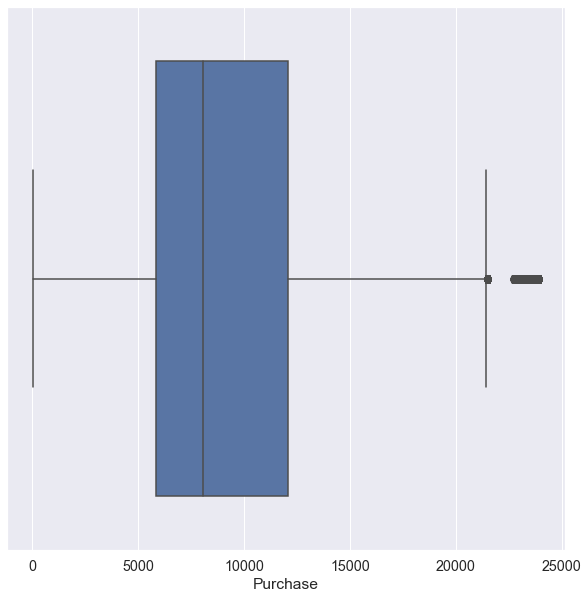

In [10]:
import seaborn as sns
sns.set(rc={'figure.figsize':[10,10]},font_scale=1.3)
sns.boxplot(x='Purchase',data=df)

## Outliers detected

In [11]:
from datasist.structdata import detect_outliers
outlier_indice=detect_outliers(df,0,['Purchase'])
outlier_indice
df.loc[outlier_indice,'Purchase']=df['Purchase'].median()

In [12]:
outlier_indice

[343,
 375,
 652,
 736,
 1041,
 1445,
 1902,
 3166,
 3167,
 3172,
 3391,
 3630,
 3908,
 4148,
 4221,
 4527,
 5059,
 5060,
 5427,
 5493,
 5494,
 5552,
 5620,
 5907,
 5953,
 6516,
 6543,
 6585,
 6692,
 6911,
 6999,
 7145,
 7201,
 7542,
 7640,
 7675,
 7818,
 7948,
 7987,
 8059,
 8432,
 8648,
 8784,
 9201,
 9377,
 9386,
 10016,
 10113,
 10155,
 10294,
 10738,
 11214,
 11398,
 11931,
 12428,
 13013,
 13186,
 13404,
 13950,
 14123,
 15356,
 15357,
 15746,
 16104,
 16147,
 16249,
 16440,
 16441,
 16550,
 17205,
 17213,
 17233,
 17304,
 17538,
 17641,
 17642,
 17726,
 17836,
 18014,
 18265,
 18615,
 18711,
 18915,
 19197,
 19218,
 19329,
 19403,
 20015,
 20080,
 20217,
 20727,
 20843,
 21457,
 21570,
 21866,
 22179,
 22181,
 22271,
 22307,
 22334,
 22613,
 22709,
 22893,
 23108,
 23203,
 23301,
 23513,
 24577,
 24771,
 25239,
 25290,
 25308,
 25488,
 26166,
 26272,
 26762,
 27214,
 27333,
 27338,
 27694,
 27698,
 28168,
 28170,
 29024,
 29086,
 29129,
 29222,
 29267,
 29599,
 29844,
 30222,
 3

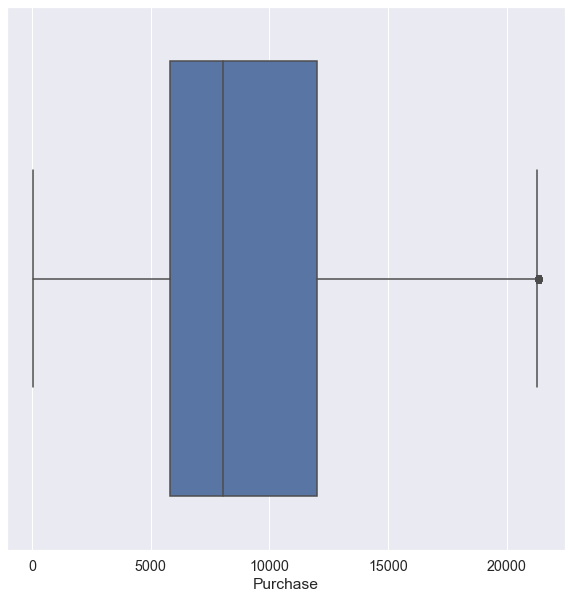

In [13]:
sns.boxplot(x='Purchase',data=df)

## Drop un-needed features

In [14]:
df.drop('User_ID', axis=1 , inplace=True)

In [15]:
df.drop('Product_ID', axis=1 , inplace=True)

In [16]:
df

,Occupation,Marital_Status,Product_Category_1,Product_Category_2,Product_Category_3,Purchase,Gender_M,City_Category_B,City_Category_C,Stay_In_Current_City_Years_1,Stay_In_Current_City_Years_2,Stay_In_Current_City_Years_3,Stay_In_Current_City_Years_4+,Age_18-25,Age_26-35,Age_36-45,Age_46-50,Age_51-55,Age_55+
0,10,0,3,8.0,16.0,8370.0,0,0,0,0,1,0,0,0,0,0,0,0,0
1,10,0,1,6.0,14.0,15200.0,0,0,0,0,1,0,0,0,0,0,0,0,0
2,10,0,12,8.0,16.0,1422.0,0,0,0,0,1,0,0,0,0,0,0,0,0
3,10,0,12,14.0,16.0,1057.0,0,0,0,0,1,0,0,0,0,0,0,0,0
4,16,0,8,8.0,16.0,7969.0,1,0,1,0,0,0,1,0,0,0,0,0,1
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
550063,13,1,20,8.0,16.0,368.0,1,1,0,1,0,0,0,0,0,0,0,1,0
550064,1,0,20,8.0,16.0,371.0,0,0,1,0,0,1,0,0,1,0,0,0,0
550065,15,1,20,8.0,16.0,137.0,0,1,0,0,0,0,1,0,1,0,0,0,0
550066,1,0,20,8.0,16.0,365.0,0,0,1,0,1,0,0,0,0,0,0,0,1


## Train-Test split

#### now the data is ready for machine learning, from the data we can assume that the target is the purchase and the other variables are the independent ones

In [17]:
x= df.drop('Purchase', axis=1)
x

,Occupation,Marital_Status,Product_Category_1,Product_Category_2,Product_Category_3,Gender_M,City_Category_B,City_Category_C,Stay_In_Current_City_Years_1,Stay_In_Current_City_Years_2,Stay_In_Current_City_Years_3,Stay_In_Current_City_Years_4+,Age_18-25,Age_26-35,Age_36-45,Age_46-50,Age_51-55,Age_55+
0,10,0,3,8.0,16.0,0,0,0,0,1,0,0,0,0,0,0,0,0
1,10,0,1,6.0,14.0,0,0,0,0,1,0,0,0,0,0,0,0,0
2,10,0,12,8.0,16.0,0,0,0,0,1,0,0,0,0,0,0,0,0
3,10,0,12,14.0,16.0,0,0,0,0,1,0,0,0,0,0,0,0,0
4,16,0,8,8.0,16.0,1,0,1,0,0,0,1,0,0,0,0,0,1
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
550063,13,1,20,8.0,16.0,1,1,0,1,0,0,0,0,0,0,0,1,0
550064,1,0,20,8.0,16.0,0,0,1,0,0,1,0,0,1,0,0,0,0
550065,15,1,20,8.0,16.0,0,1,0,0,0,0,1,0,1,0,0,0,0
550066,1,0,20,8.0,16.0,0,0,1,0,1,0,0,0,0,0,0,0,1


In [18]:
y=df[['Purchase']]
y

,Purchase
0,8370.0
1,15200.0
2,1422.0
3,1057.0
4,7969.0
...,...
550063,368.0
550064,371.0
550065,137.0
550066,365.0


In [19]:
from sklearn.model_selection import train_test_split
x_train,x_test,y_train,y_test=train_test_split(x,y,test_size=0.2)

In [20]:
x_train

,Occupation,Marital_Status,Product_Category_1,Product_Category_2,Product_Category_3,Gender_M,City_Category_B,City_Category_C,Stay_In_Current_City_Years_1,Stay_In_Current_City_Years_2,Stay_In_Current_City_Years_3,Stay_In_Current_City_Years_4+,Age_18-25,Age_26-35,Age_36-45,Age_46-50,Age_51-55,Age_55+
507430,7,1,8,8.0,16.0,1,1,0,0,0,0,0,0,0,1,0,0,0
549370,14,1,19,8.0,16.0,0,0,1,1,0,0,0,0,1,0,0,0,0
345510,7,1,5,15.0,16.0,0,1,0,0,0,0,1,0,0,1,0,0,0
313585,4,0,1,2.0,11.0,1,1,0,0,0,1,0,1,0,0,0,0,0
255095,4,0,5,8.0,16.0,1,0,0,0,0,0,0,1,0,0,0,0,0
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
103700,4,0,2,5.0,8.0,1,1,0,1,0,0,0,0,1,0,0,0,0
499146,13,1,5,8.0,14.0,0,0,1,0,0,0,1,0,0,0,0,1,0
293224,4,1,5,8.0,16.0,1,1,0,0,1,0,0,0,1,0,0,0,0
43264,0,1,5,8.0,16.0,1,0,0,0,0,0,0,0,1,0,0,0,0


In [21]:
x_test


,Occupation,Marital_Status,Product_Category_1,Product_Category_2,Product_Category_3,Gender_M,City_Category_B,City_Category_C,Stay_In_Current_City_Years_1,Stay_In_Current_City_Years_2,Stay_In_Current_City_Years_3,Stay_In_Current_City_Years_4+,Age_18-25,Age_26-35,Age_36-45,Age_46-50,Age_51-55,Age_55+
539638,4,0,4,5.0,9.0,1,1,0,1,0,0,0,1,0,0,0,0,0
46289,12,1,6,8.0,16.0,1,0,0,1,0,0,0,1,0,0,0,0,0
119275,1,1,5,8.0,16.0,0,1,0,0,0,0,0,0,0,0,1,0,0
41095,4,0,5,8.0,16.0,1,1,0,0,0,1,0,1,0,0,0,0,0
68492,1,1,8,8.0,16.0,1,0,1,0,0,0,0,0,0,0,1,0,0
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
450470,3,0,5,14.0,16.0,0,0,1,0,0,0,1,1,0,0,0,0,0
149151,6,1,15,16.0,16.0,1,1,0,0,1,0,0,0,0,0,0,1,0
351267,13,0,1,2.0,16.0,1,0,1,1,0,0,0,0,0,0,0,0,1
77894,0,1,15,8.0,16.0,1,0,1,1,0,0,0,0,0,0,0,1,0


In [22]:
y_train

,Purchase
507430,7764.0
549370,38.0
345510,7164.0
313585,11895.0
255095,8771.0
...,...
103700,13199.0
499146,6922.0
293224,5285.0
43264,7068.0


In [23]:
y_test

,Purchase
539638,785.0
46289,8075.0
119275,6862.0
41095,5211.0
68492,6075.0
...,...
450470,8885.0
149151,21320.0
351267,11931.0
77894,12533.0


# loans Dataset

In [24]:
import pandas as pd
df1=pd.read_csv('loan_data.csv')
df1

,credit.policy,purpose,int.rate,installment,log.annual.inc,dti,fico,days.with.cr.line,revol.bal,revol.util,inq.last.6mths,delinq.2yrs,pub.rec,not.fully.paid
0,1,debt_consolidation,0.1189,829.10,11.350407,19.48,737,5639.958333,28854,52.1,0,0,0,0
1,1,credit_card,0.1071,228.22,11.082143,14.29,707,2760.000000,33623,76.7,0,0,0,0
2,1,debt_consolidation,0.1357,366.86,10.373491,11.63,682,4710.000000,3511,25.6,1,0,0,0
3,1,debt_consolidation,0.1008,162.34,11.350407,8.10,712,2699.958333,33667,73.2,1,0,0,0
4,1,credit_card,0.1426,102.92,11.299732,14.97,667,4066.000000,4740,39.5,0,1,0,0
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
9573,0,all_other,0.1461,344.76,12.180755,10.39,672,10474.000000,215372,82.1,2,0,0,1
9574,0,all_other,0.1253,257.70,11.141862,0.21,722,4380.000000,184,1.1,5,0,0,1
9575,0,debt_consolidation,0.1071,97.81,10.596635,13.09,687,3450.041667,10036,82.9,8,0,0,1
9576,0,home_improvement,0.1600,351.58,10.819778,19.18,692,1800.000000,0,3.2,5,0,0,1


In [25]:
df1.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 9578 entries, 0 to 9577
Data columns (total 14 columns):
 #   Column             Non-Null Count  Dtype  
---  ------             --------------  -----  
 0   credit.policy      9578 non-null   int64  
 1   purpose            9578 non-null   object 
 2   int.rate           9578 non-null   float64
 3   installment        9578 non-null   float64
 4   log.annual.inc     9578 non-null   float64
 5   dti                9578 non-null   float64
 6   fico               9578 non-null   int64  
 7   days.with.cr.line  9578 non-null   float64
 8   revol.bal          9578 non-null   int64  
 9   revol.util         9578 non-null   float64
 10  inq.last.6mths     9578 non-null   int64  
 11  delinq.2yrs        9578 non-null   int64  
 12  pub.rec            9578 non-null   int64  
 13  not.fully.paid     9578 non-null   int64  
dtypes: float64(6), int64(7), object(1)
memory usage: 1.0+ MB


## Missing data

In [26]:
df1.isnull().sum()

credit.policy        0
purpose              0
int.rate             0
installment          0
log.annual.inc       0
dti                  0
fico                 0
days.with.cr.line    0
revol.bal            0
revol.util           0
inq.last.6mths       0
delinq.2yrs          0
pub.rec              0
not.fully.paid       0
dtype: int64

#### No missing values found

## Categorical Features

In [27]:
df1=pd.get_dummies(df1, columns=['purpose'], drop_first=True)
df1

,credit.policy,int.rate,installment,log.annual.inc,dti,fico,days.with.cr.line,revol.bal,revol.util,inq.last.6mths,delinq.2yrs,pub.rec,not.fully.paid,purpose_credit_card,purpose_debt_consolidation,purpose_educational,purpose_home_improvement,purpose_major_purchase,purpose_small_business
0,1,0.1189,829.10,11.350407,19.48,737,5639.958333,28854,52.1,0,0,0,0,0,1,0,0,0,0
1,1,0.1071,228.22,11.082143,14.29,707,2760.000000,33623,76.7,0,0,0,0,1,0,0,0,0,0
2,1,0.1357,366.86,10.373491,11.63,682,4710.000000,3511,25.6,1,0,0,0,0,1,0,0,0,0
3,1,0.1008,162.34,11.350407,8.10,712,2699.958333,33667,73.2,1,0,0,0,0,1,0,0,0,0
4,1,0.1426,102.92,11.299732,14.97,667,4066.000000,4740,39.5,0,1,0,0,1,0,0,0,0,0
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
9573,0,0.1461,344.76,12.180755,10.39,672,10474.000000,215372,82.1,2,0,0,1,0,0,0,0,0,0
9574,0,0.1253,257.70,11.141862,0.21,722,4380.000000,184,1.1,5,0,0,1,0,0,0,0,0,0
9575,0,0.1071,97.81,10.596635,13.09,687,3450.041667,10036,82.9,8,0,0,1,0,1,0,0,0,0
9576,0,0.1600,351.58,10.819778,19.18,692,1800.000000,0,3.2,5,0,0,1,0,0,0,1,0,0


## detect outliers

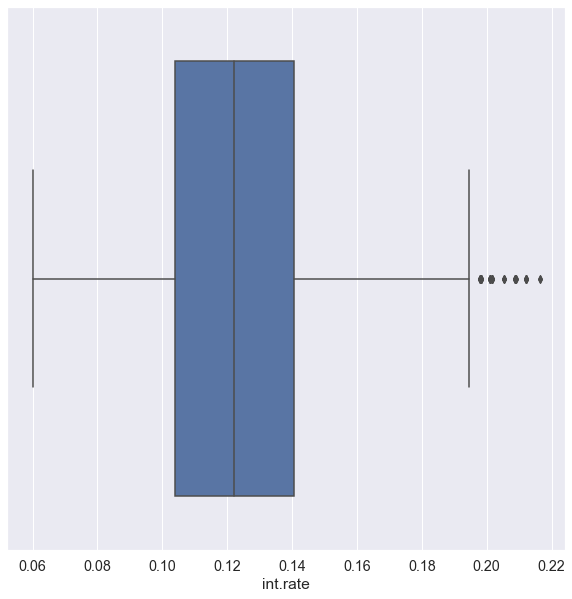

In [28]:
sns.boxplot(x='int.rate', data=df1)

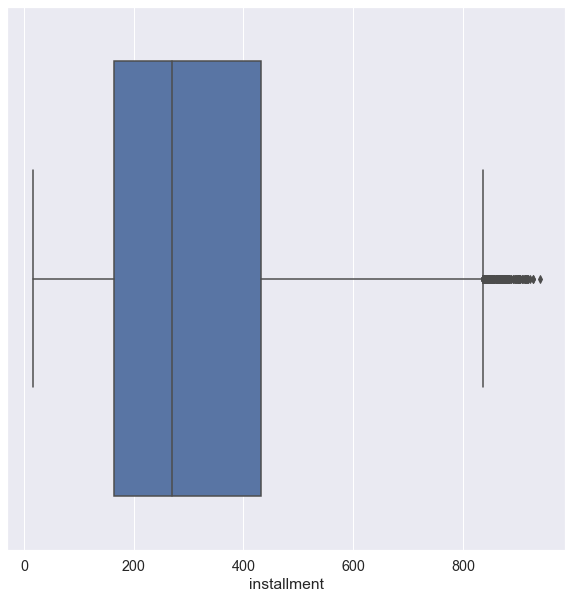

In [29]:
sns.boxplot(x='installment', data=df1)

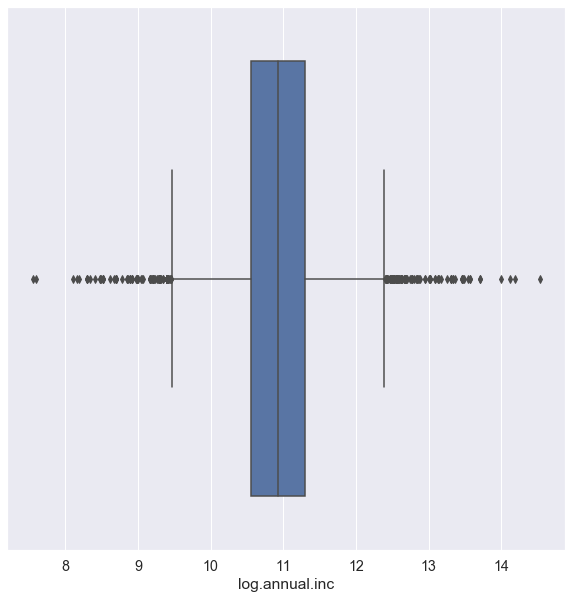

In [30]:
sns.boxplot(x='log.annual.inc', data=df1)

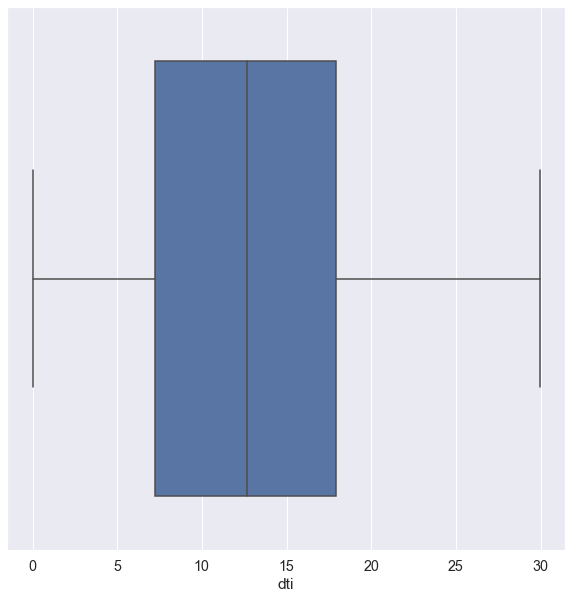

In [31]:
sns.boxplot(x='dti', data=df1)

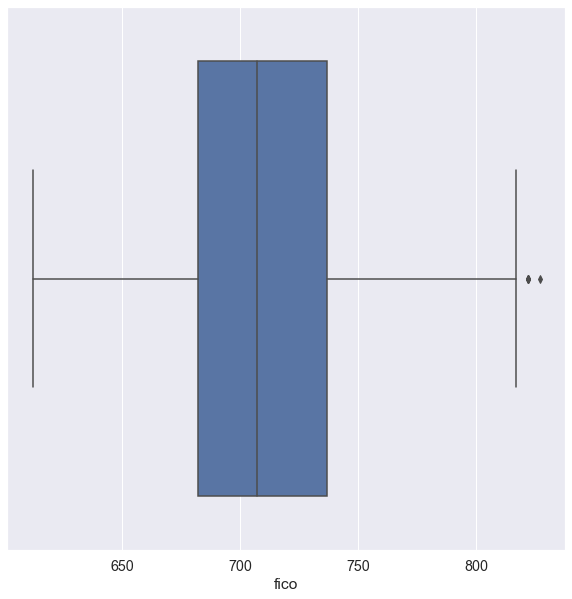

In [32]:
sns.boxplot(x='fico', data=df1)

In [33]:
outlier_indices=detect_outliers(df1,0,df1.columns)
len(outlier_indices)

6270

#### We can't drop because we have a small dataset

In [34]:
for col in ['int.rate','installment','log.annual.inc','fico','days.with.cr.line','revol.bal','revol.util']:
    outlier_indecies=detect_outliers(df1,0,[col])
    df1.loc[outlier_indecies,col]=df1[col].median()

In [35]:
df1.columns

Index(['credit.policy', 'int.rate', 'installment', 'log.annual.inc', 'dti',
       'fico', 'days.with.cr.line', 'revol.bal', 'revol.util',
       'inq.last.6mths', 'delinq.2yrs', 'pub.rec', 'not.fully.paid',
       'purpose_credit_card', 'purpose_debt_consolidation',
       'purpose_educational', 'purpose_home_improvement',
       'purpose_major_purchase', 'purpose_small_business'],
      dtype='object')

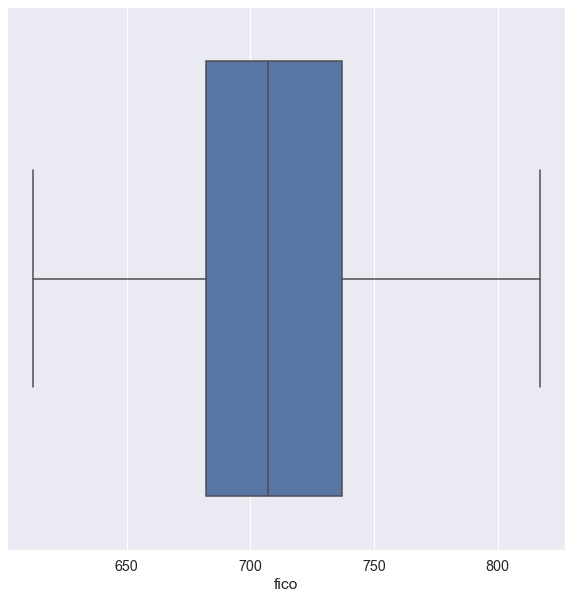

In [36]:
sns.boxplot(x='fico', data=df1)

## Train test split

In [37]:
x1=df1.drop('not.fully.paid',axis=1)
y1=df1['not.fully.paid']
from sklearn.model_selection import train_test_split
x1_train,x1_test,y1_train,y1_test=train_test_split(x1,y1,test_size=0.2)
x1_train

,credit.policy,int.rate,installment,log.annual.inc,dti,fico,days.with.cr.line,revol.bal,revol.util,inq.last.6mths,delinq.2yrs,pub.rec,purpose_credit_card,purpose_debt_consolidation,purpose_educational,purpose_home_improvement,purpose_major_purchase,purpose_small_business
4075,1,0.1357,628.42,11.277203,10.68,707.0,4466.000000,6495.0,42.7,1,1,0,0,0,0,0,0,0
8946,0,0.1221,333.15,11.626218,7.02,732.0,4830.000000,12279.0,36.4,5,0,0,0,1,0,0,0,0
8068,0,0.1312,270.02,10.181119,11.32,657.0,1410.000000,3919.0,37.7,15,0,0,0,1,0,0,0,0
6693,1,0.0894,266.89,10.621327,13.90,737.0,5730.041667,9851.0,43.2,0,0,0,0,0,0,0,0,0
9175,0,0.1505,333.04,11.289782,24.27,667.0,4320.000000,8596.0,94.2,0,0,0,1,0,0,0,0,0
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
8162,0,0.1299,203.82,10.714418,22.77,692.0,5719.041667,22191.0,85.3,6,0,1,0,1,0,0,0,0
8739,0,0.1412,205.42,10.839581,9.01,657.0,5219.958333,4050.0,34.6,4,3,0,0,0,0,0,0,0
7882,0,0.1501,332.84,11.407565,15.33,652.0,6418.958333,22158.0,80.7,10,2,1,0,1,0,0,0,0
6441,1,0.0740,31.06,10.714418,3.84,762.0,3360.041667,2387.0,6.9,1,0,0,0,0,0,0,0,0


In [38]:
y1_train.value_counts()*100/len(y1_train)

0    84.259984
1    15.740016
Name: not.fully.paid, dtype: float64

In [39]:
from imblearn.over_sampling import SMOTE
sampler=SMOTE()
x1_train,y1_train=sampler.fit_resample(x1_train,y1_train)
y1_train.value_counts()

1    6456
0    6456
Name: not.fully.paid, dtype: int64